In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [2]:
df = pd.read_csv(r'C:/Users/User/Downloads/Eksperimen_SML_IbrahimAkbarArsanata/percobaan 1/Churn_Modelling.csv')
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# EDA

## 1. Pemahaman Awal Data dan Struktur

In [3]:
print("Dimensi Data:")
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")

print("\nInformasi Tipe Data per Kolom:")
df.info()

print("\nLima Baris Pertama Data:")
print(df.head())

print("\nLima Baris Terakhir Data:")
print(df.tail())

print("\nNama-nama Kolom:")
print(df.columns.tolist())

Dimensi Data:
Jumlah Baris: 10000
Jumlah Kolom: 14

Informasi Tipe Data per Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

Lima Baris

## 2. Statistik Deskriptif

Statistik Deskriptif untuk Kolom Numerik:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584   

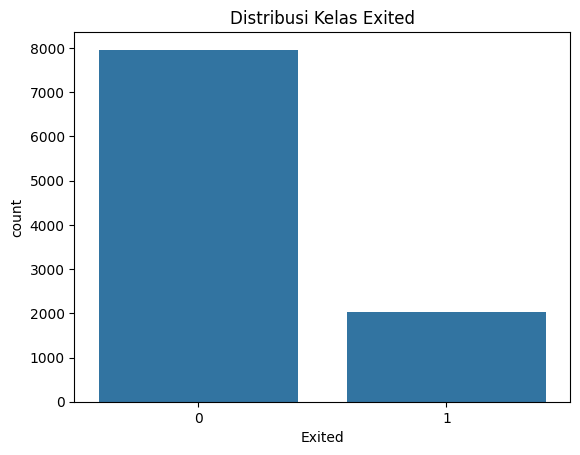

In [4]:
print("Statistik Deskriptif untuk Kolom Numerik:")
print(df.describe())

print("\nStatistik Deskriptif untuk Kolom Kategorikal (count, unique, top, freq):")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nKolom: {col}")
    print(df[col].describe())

print("\nDistribusi nilai untuk kolom 'Geography':")
print(df['Geography'].value_counts())

print("\nDistribusi nilai untuk kolom 'Gender':")
print(df['Gender'].value_counts())

print("\nDistribusi nilai untuk kolom 'NumOfProducts':")
print(df['NumOfProducts'].value_counts())

print("\nDistribusi nilai untuk kolom 'HasCrCard':")
print(df['HasCrCard'].value_counts())

print("\nDistribusi nilai untuk kolom 'IsActiveMember':")
print(df['IsActiveMember'].value_counts())

print("\nDistribusi nilai untuk kolom 'Exited' (Variabel Target):")
print(df['Exited'].value_counts())
sns.countplot(x='Exited', data=df)
plt.title('Distribusi Kelas Exited')
plt.show()

imbalanced class

## 3. Penanganan Missing Values

Jumlah Missing Values per Kolom:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Persentase Missing Values per Kolom:
RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64


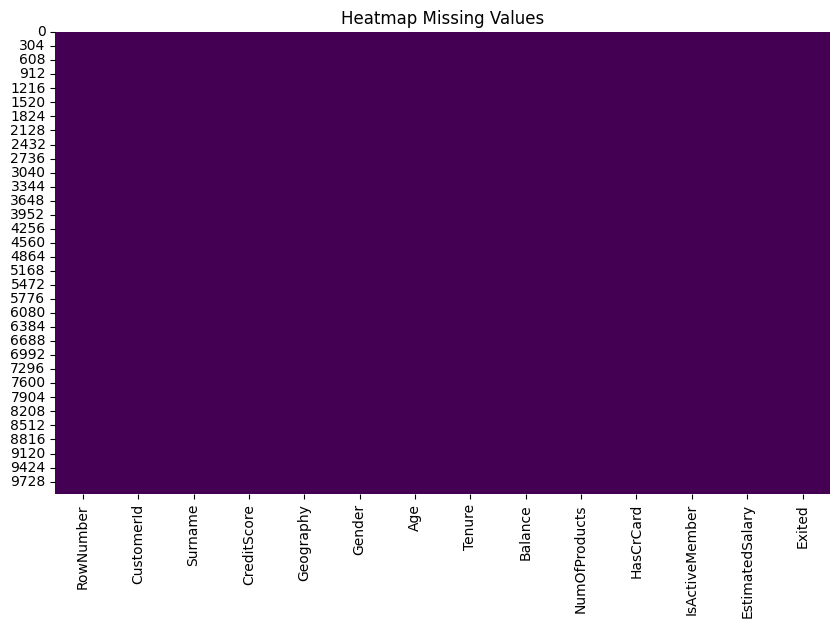

In [5]:
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

print("\nPersentase Missing Values per Kolom:")
print((df.isnull().sum() / len(df)) * 100)

# Visualisasi Missing Values (jika ada)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap Missing Values')
plt.show()

# Contoh penanganan (jika ada missing values)
# Karena data contoh sangat kecil, mungkin tidak ada missing values.
# Jika ada, strategi bisa:
# df.dropna(inplace=True) # Menghapus baris dengan missing values
# df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean(), inplace=True) # Mengisi dengan mean

## 4.Analisis Duplikasi Data

In [6]:
# Mengecualikan 'RowNumber' dan 'CustomerId' karena keduanya adalah ID unik
duplicate_columns = df.columns.drop(['RowNumber', 'CustomerId'])
print("Jumlah Baris Duplikat (mengabaikan RowNumber dan CustomerId):")
print(df.duplicated(subset=duplicate_columns).sum())

if df.duplicated(subset=duplicate_columns).sum() > 0:
    print("\nBaris Duplikat (mengabaikan RowNumber dan CustomerId):")
    print(df[df.duplicated(subset=duplicate_columns, keep=False)]) # Menampilkan semua duplikat
    # df.drop_duplicates(subset=duplicate_columns, inplace=True) # Menghapus duplikat
    # print(f"\nJumlah Baris Setelah Penghapusan Duplikat: {df.shape[0]}")
else:
    print("Tidak ada duplikasi data yang signifikan (mengabaikan ID unik).")

Jumlah Baris Duplikat (mengabaikan RowNumber dan CustomerId):
0
Tidak ada duplikasi data yang signifikan (mengabaikan ID unik).


## 5. Analisis Outlier

Analisis Outlier untuk Kolom Numerik:


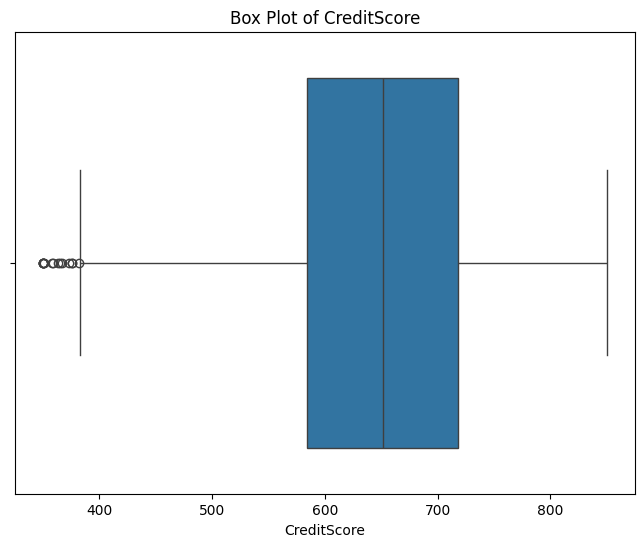


Outlier di kolom 'CreditScore':
      CreditScore
7             376
942           376
1193          363
1405          359
1631          350
1838          350
1962          358
2473          351
2579          365
8154          367
8723          350
8762          350
9210          382
9356          373
9624          350


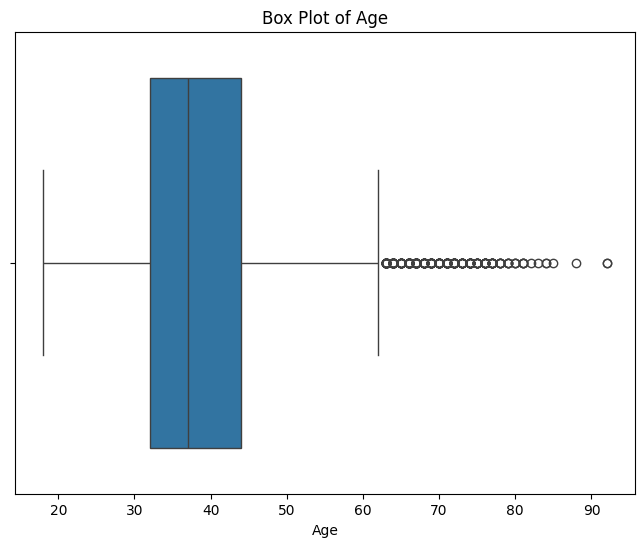


Outlier di kolom 'Age':
      Age
58     66
85     75
104    65
158    73
181    65
...   ...
9753   68
9765   64
9832   64
9894   77
9936   77

[359 rows x 1 columns]


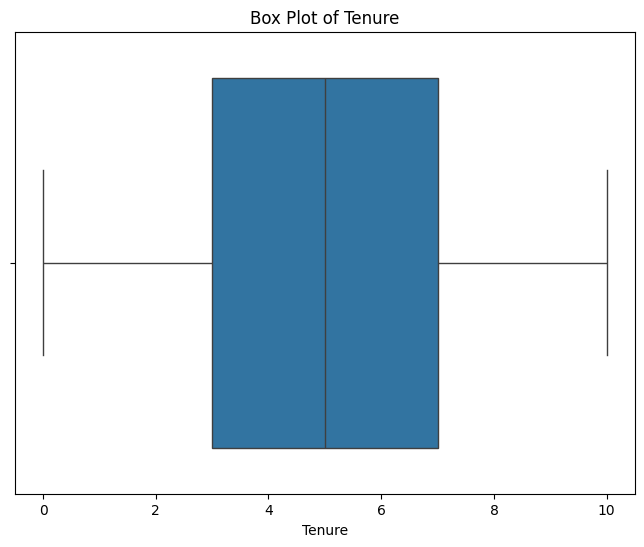


Tidak ada outlier yang terdeteksi di kolom 'Tenure' menggunakan metode IQR.


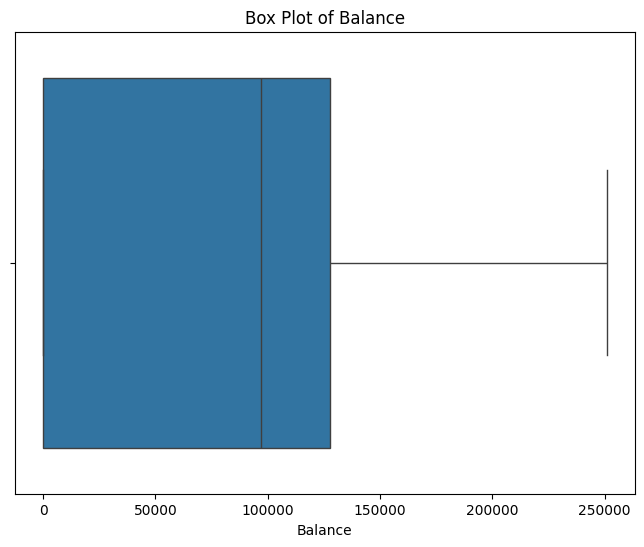


Tidak ada outlier yang terdeteksi di kolom 'Balance' menggunakan metode IQR.


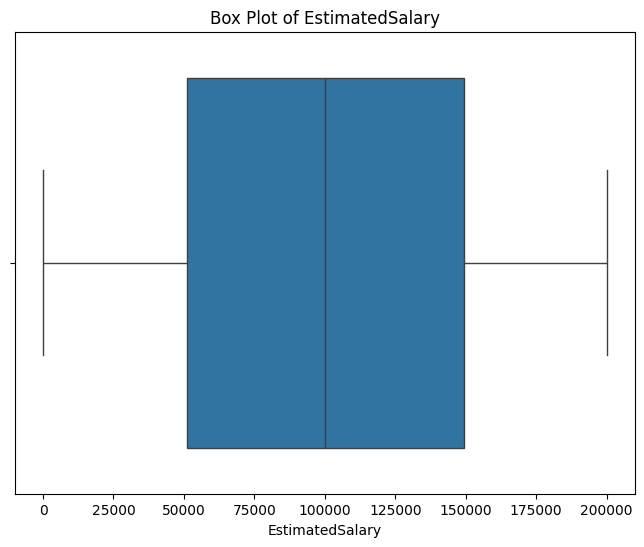


Tidak ada outlier yang terdeteksi di kolom 'EstimatedSalary' menggunakan metode IQR.


In [7]:
print("Analisis Outlier untuk Kolom Numerik:")

# Kolom yang relevan untuk outlier (tidak termasuk ID dan biner)
outlier_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for col in outlier_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

    # Contoh identifikasi outlier menggunakan IQR (hanya contoh, tidak akan mengubah data)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"\nOutlier di kolom '{col}':")
        print(outliers[[col]])
    else:
        print(f"\nTidak ada outlier yang terdeteksi di kolom '{col}' menggunakan metode IQR.")

## 6. Analisis Distribusi Data (Kolom Numerik)

Distribusi Kolom Numerik:


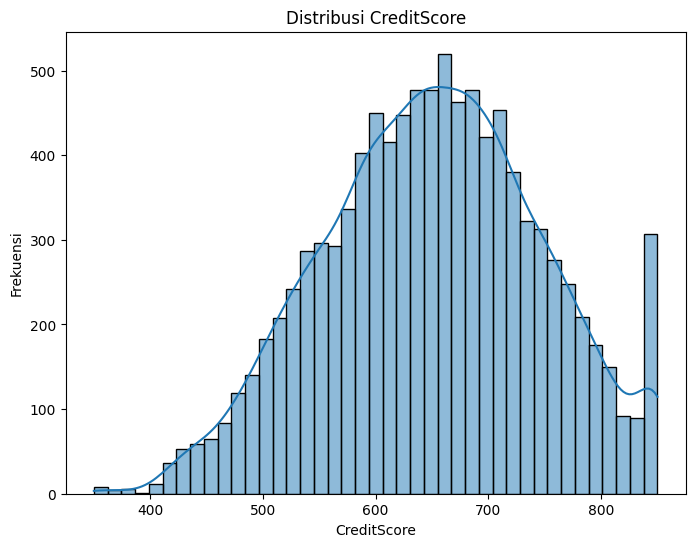

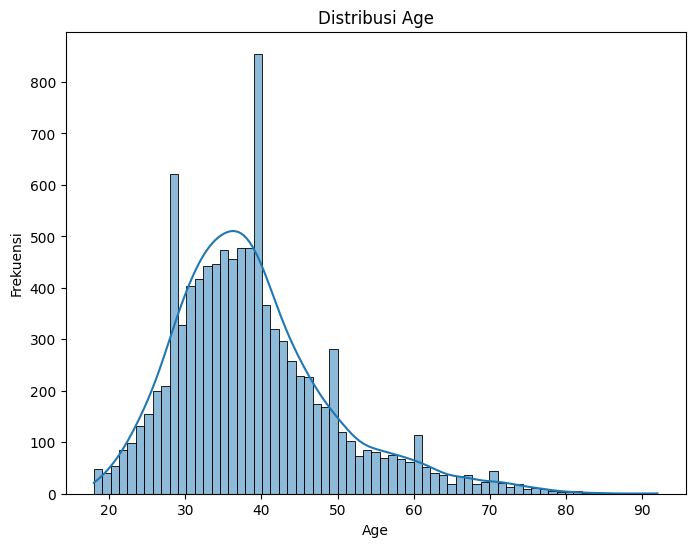

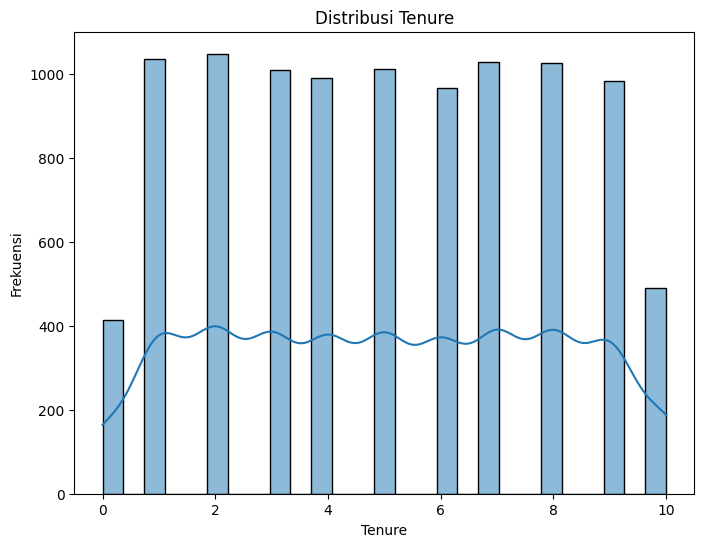

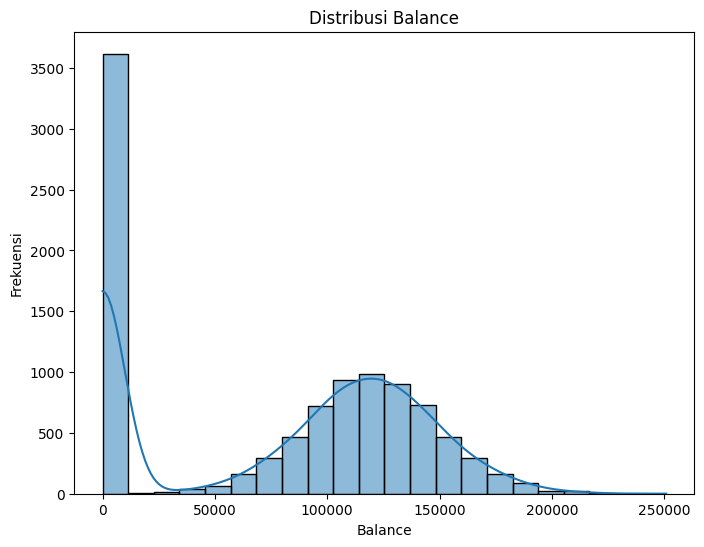

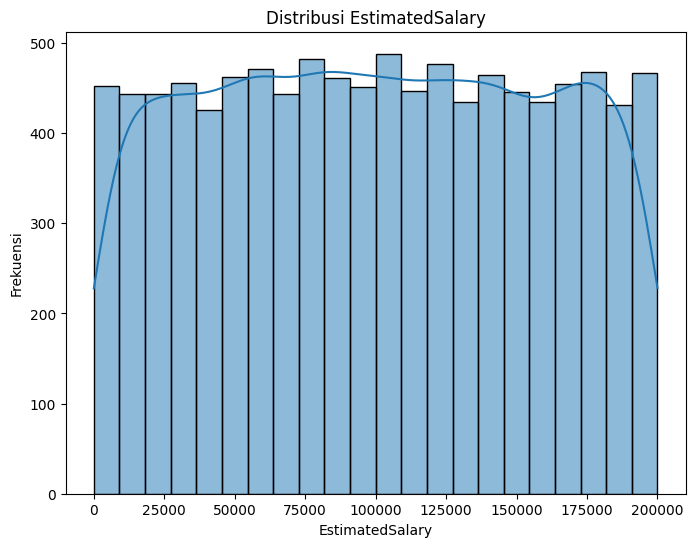

In [8]:
print("Distribusi Kolom Numerik:")

numeric_cols_for_dist = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for col in numeric_cols_for_dist:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

winsorizing karna outlier bukan kesalahan input melainkan distribusi data asli, dan saya ingin mempertahankan itu

## 7. Analisis Distribusi Data (Kolom Kategorikal)

Distribusi Kolom Kategorikal:


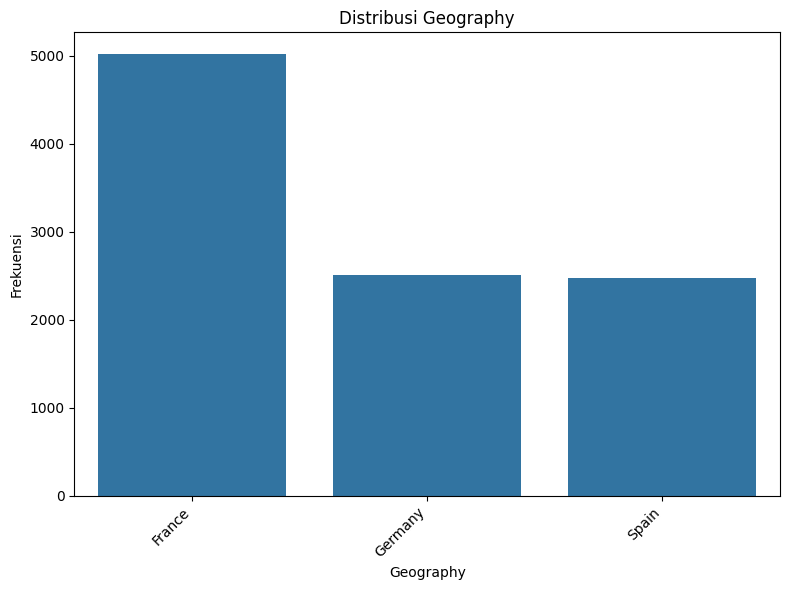

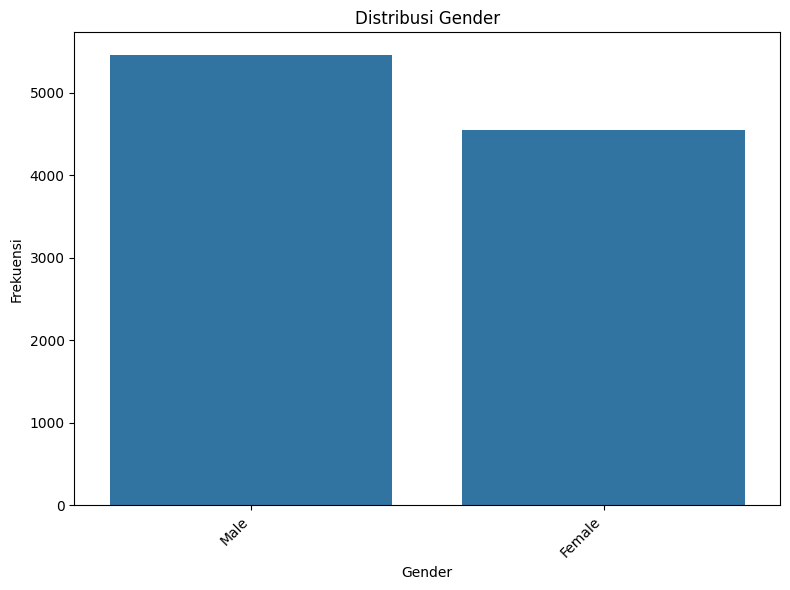

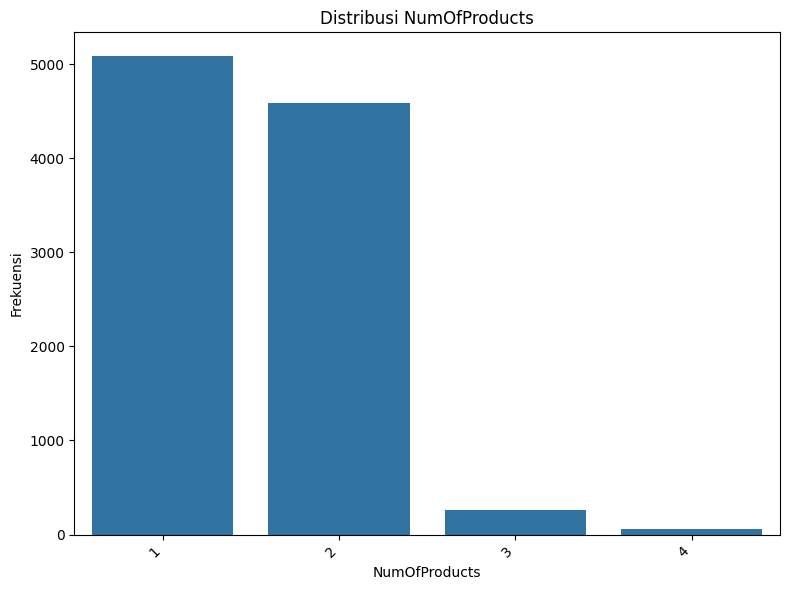

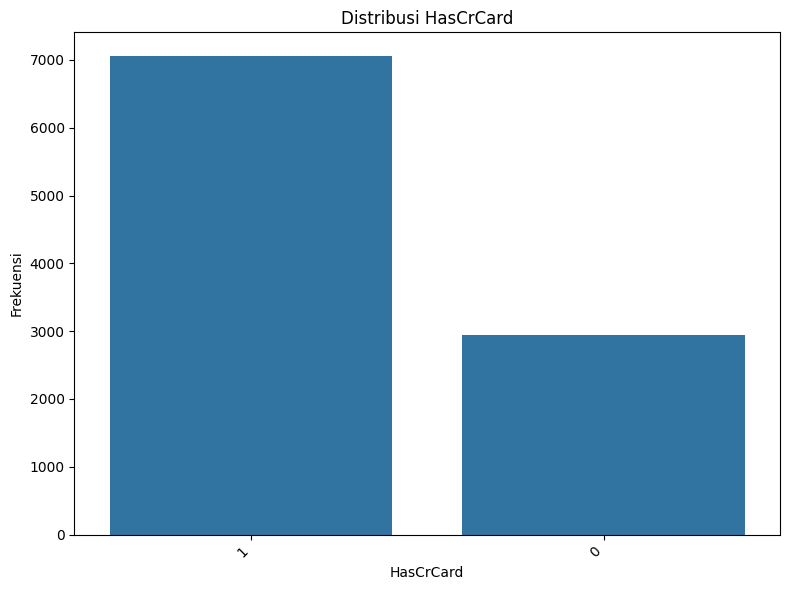

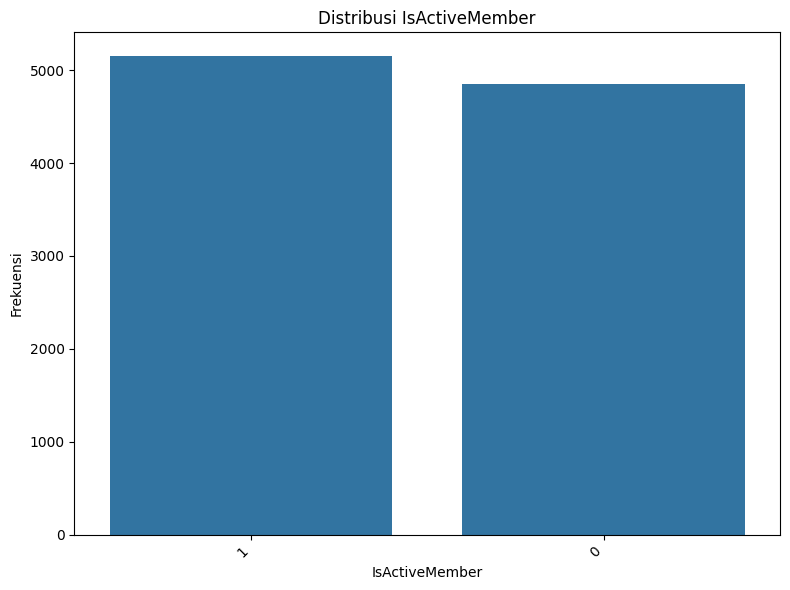

In [9]:
print("Distribusi Kolom Kategorikal:")

categorical_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

gabungkan 3 adn 4 pada num of products

## 8. Analisis Korelasi

Matriks Korelasi Antar Kolom Numerik:
                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActive

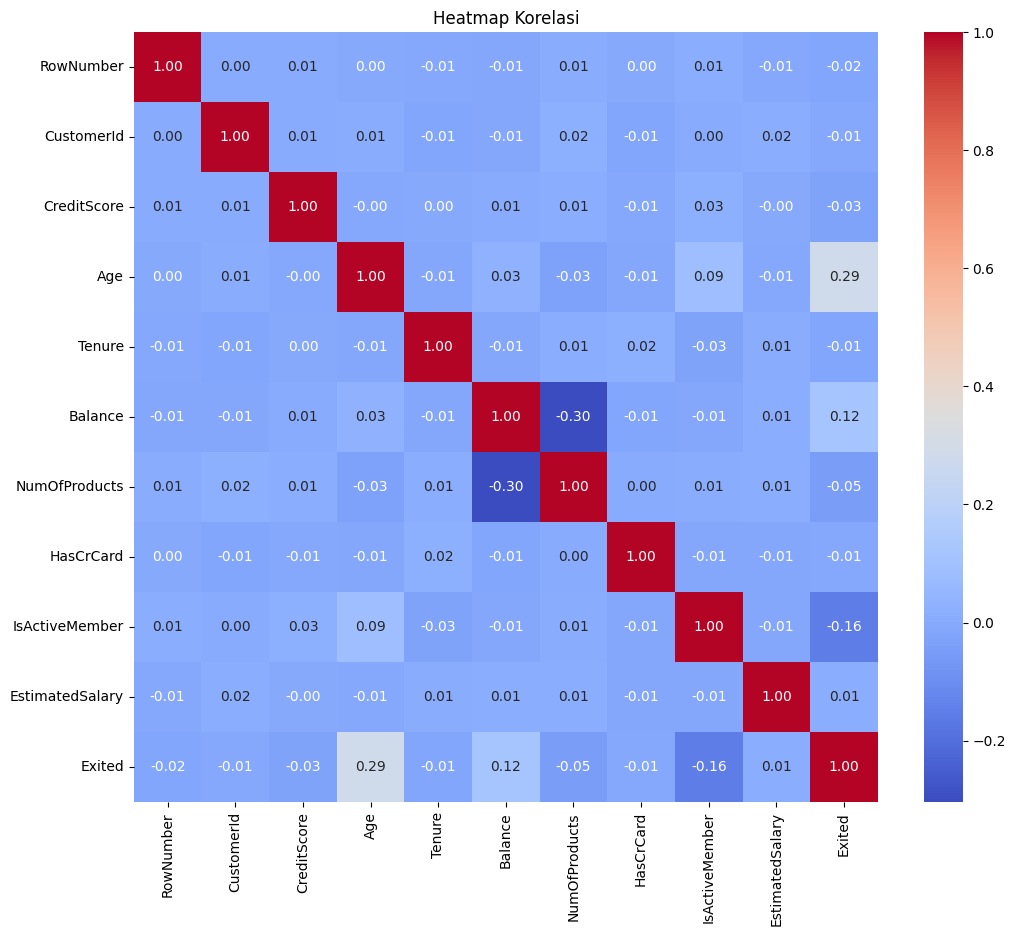

In [10]:
print("Matriks Korelasi Antar Kolom Numerik:")
correlation_matrix = df.select_dtypes(include=np.number).corr()
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

Hapus Kolom ID: Hapus RowNumber dan CustomerId.

## 9. Analisis Hubungan Antara Fitur dan Target (Exited)

Hubungan antara Geography dan Exited:


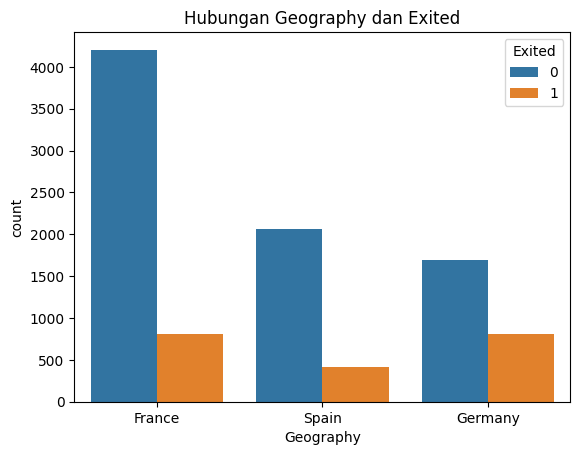


Hubungan antara Gender dan Exited:


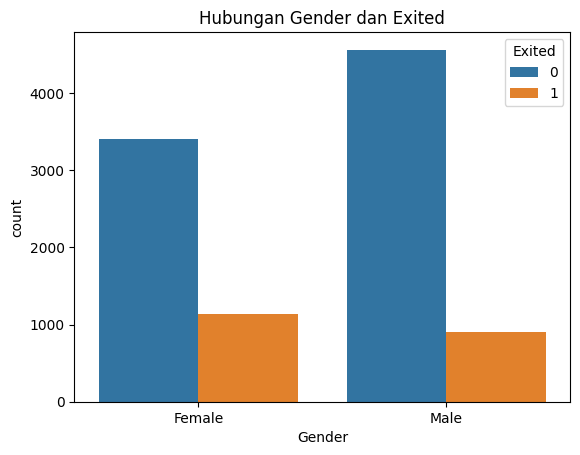


Hubungan antara Age dan Exited:


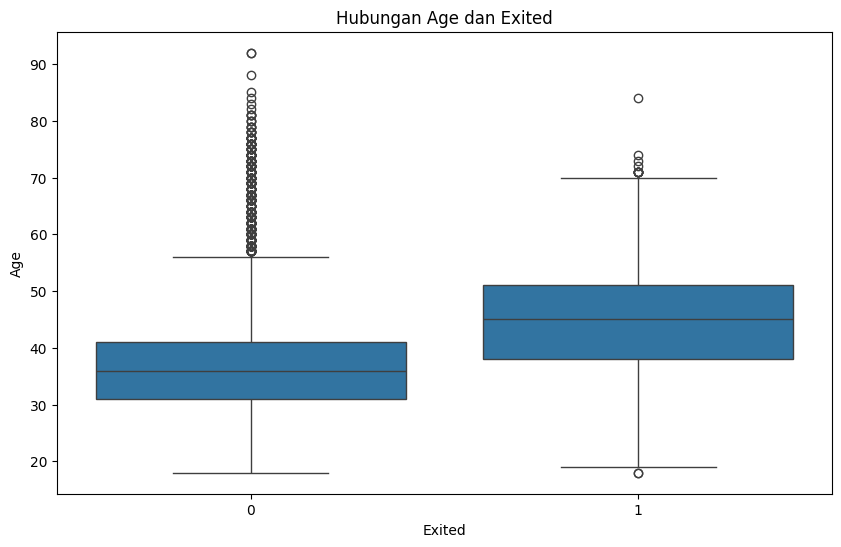


Hubungan antara CreditScore dan Exited:


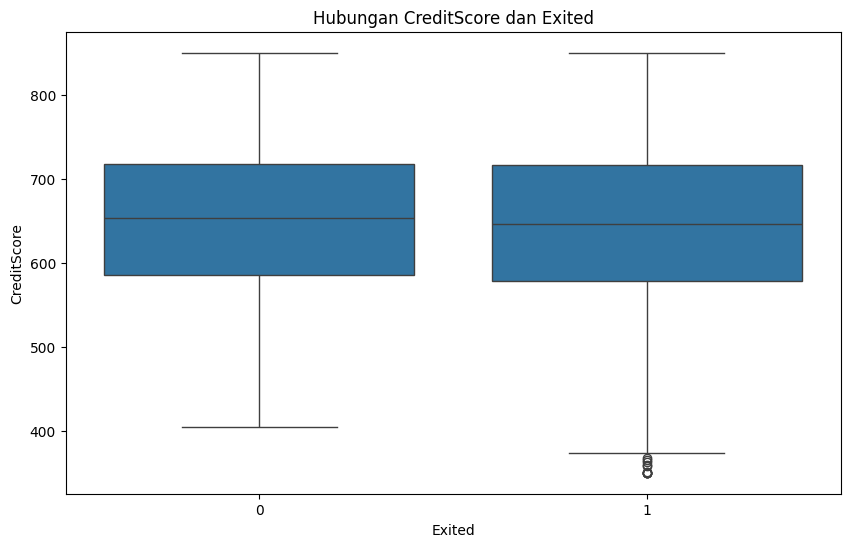


Hubungan antara Balance dan Exited:


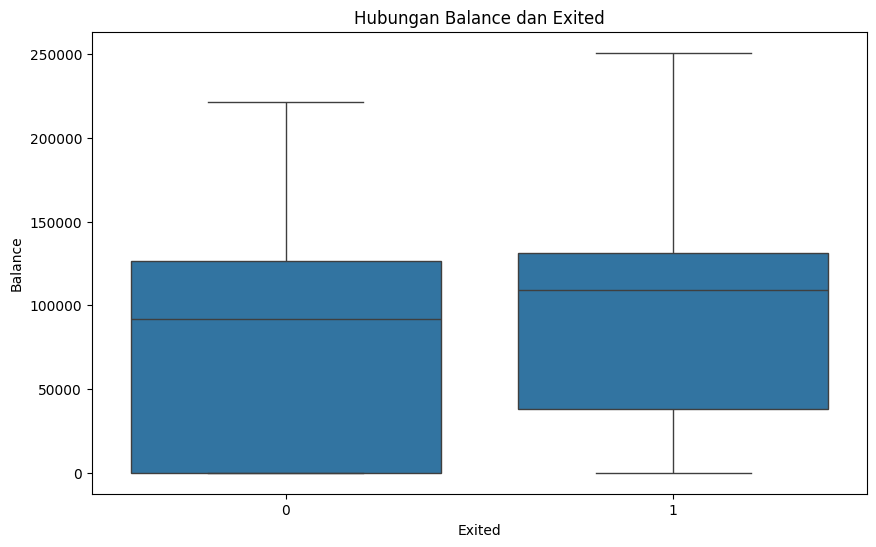


Hubungan antara NumOfProducts dan Exited:


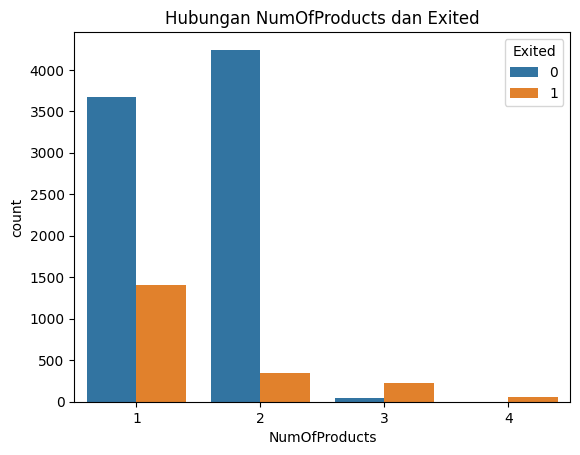


Hubungan antara IsActiveMember dan Exited:


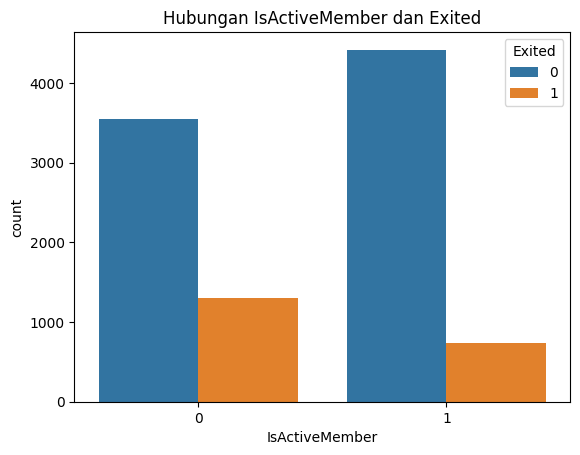

In [11]:
print("Hubungan antara Geography dan Exited:")
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Hubungan Geography dan Exited')
plt.show()

print("\nHubungan antara Gender dan Exited:")
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Hubungan Gender dan Exited')
plt.show()

print("\nHubungan antara Age dan Exited:")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Hubungan Age dan Exited')
plt.show()

print("\nHubungan antara CreditScore dan Exited:")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Hubungan CreditScore dan Exited')
plt.show()

print("\nHubungan antara Balance dan Exited:")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Hubungan Balance dan Exited')
plt.show()

print("\nHubungan antara NumOfProducts dan Exited:")
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Hubungan NumOfProducts dan Exited')
plt.show()

print("\nHubungan antara IsActiveMember dan Exited:")
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Hubungan IsActiveMember dan Exited')
plt.show()

## 10 Feature Engineering (Contoh Awal)

Contoh Feature Engineering: Membuat rasio jika Balance > 0

DataFrame dengan Fitur Baru:
     Balance  EstimatedSalary  BalanceToSalaryRatio
0       0.00        101348.88              0.000000
1   83807.86        112542.58              0.744677
2  159660.80        113931.57              1.401375
3       0.00         93826.63              0.000000
4  125510.82         79084.10              1.587055

Hubungan antara BalanceToSalaryRatio dan Exited:


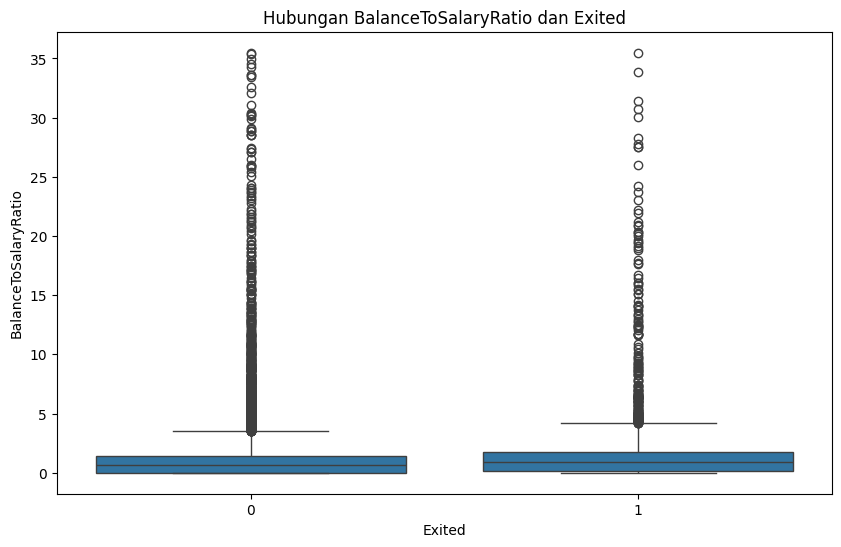

In [12]:
print("Contoh Feature Engineering: Membuat rasio jika Balance > 0")

# Contoh sederhana: Ratio of Balance to Estimated Salary for customers with balance > 0
# Hindari pembagian dengan nol
df['BalanceToSalaryRatio'] = np.where(df['EstimatedSalary'] != 0, df['Balance'] / df['EstimatedSalary'], 0)

print("\nDataFrame dengan Fitur Baru:")
print(df[['Balance', 'EstimatedSalary', 'BalanceToSalaryRatio']].head())

# Analisis hubungan fitur baru dengan Exited
print("\nHubungan antara BalanceToSalaryRatio dan Exited:")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='BalanceToSalaryRatio', data=df[df['BalanceToSalaryRatio'] < df['BalanceToSalaryRatio'].quantile(0.99)]) # Menyingkirkan outlier ekstrem untuk visualisasi
plt.title('Hubungan BalanceToSalaryRatio dan Exited')
plt.show()

## 11. Analisis Kardinalitas Kolom Kategorikal

In [13]:
print("Kardinalitas Kolom Kategorikal:")

for col in df.select_dtypes(include=['object', 'category']).columns:
    unique_count = df[col].nunique()
    print(f"Kolom '{col}': {unique_count} nilai unik")

# Kolom 'Surname' memiliki kardinalitas tinggi karena ini adalah nama unik.
# Kolom ini biasanya dihapus dalam analisis churn.

Kardinalitas Kolom Kategorikal:
Kolom 'Surname': 2932 nilai unik
Kolom 'Geography': 3 nilai unik
Kolom 'Gender': 2 nilai unik


## 12.Penanganan Tipe Data yang Tidak Sesuai (Konfirmasi Ulang)

In [14]:
print("Konfirmasi Tipe Data Setelah EDA:")
df.info()

# Jika ada kolom yang masih salah tipe datanya, koreksi di sini.

Konfirmasi Tipe Data Setelah EDA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowNumber             10000 non-null  int64  
 1   CustomerId            10000 non-null  int64  
 2   Surname               10000 non-null  object 
 3   CreditScore           10000 non-null  int64  
 4   Geography             10000 non-null  object 
 5   Gender                10000 non-null  object 
 6   Age                   10000 non-null  int64  
 7   Tenure                10000 non-null  int64  
 8   Balance               10000 non-null  float64
 9   NumOfProducts         10000 non-null  int64  
 10  HasCrCard             10000 non-null  int64  
 11  IsActiveMember        10000 non-null  int64  
 12  EstimatedSalary       10000 non-null  float64
 13  Exited                10000 non-null  int64  
 14  BalanceToSalaryRatio  10000 non-null 

# Data Preprocessing

## Encode

In [16]:
df_encoded = pd.get_dummies(df.copy(), columns=['Gender', 'Geography'], drop_first=True)

# Menampilkan 5 baris pertama dari DataFrame yang sudah di-encoded
print("DataFrame setelah One-Hot Encoding:")
print(df_encoded.head())

# Menampilkan kolom-kolom baru yang terbentuk
print("\nKolom-kolom baru setelah encoding:")
print([col for col in df_encoded.columns if 'Gender_' in col or 'Geography_' in col])

DataFrame setelah One-Hot Encoding:
   RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502   42       8  159660.80   
3          4    15701354      Boni          699   39       1       0.00   
4          5    15737888  Mitchell          850   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   BalanceToSalaryRatio  Gender_Male  Geography_Germany  Geography_Spain  
0    

In [28]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame

# List of columns to convert
columns_to_convert = ['Gender_Male', 'Geography_Germany', 'Geography_Spain']

for col in columns_to_convert:
    df_encoded[col] = df_encoded[col].astype(int)

print(df_encoded[columns_to_convert].head()) # To see the converted columns

   Gender_Male  Geography_Germany  Geography_Spain
0            0                  0                0
1            0                  0                1
2            0                  0                0
3            0                  0                0
4            0                  0                1


In [29]:
df_encoded

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceToSalaryRatio,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0.000000,0,0,0
4,5,15737888,Mitchell,812,43,2,125510.82,1,1,1,79084.10,0,1.587055,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0.000000,1,0,0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0.564108,1,0,0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,0.000000,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0.808230,1,1,0


## Outlier

In [18]:
# Definisikan kolom yang akan di-winsorize
columns_to_winsorize = ['CreditScore', 'Age']

# Persentil untuk winsorizing (misalnya, 5% di ujung bawah dan 5% di ujung atas)
# llimits: persentil bawah, rlimits: persentil atas
# (0.05, 0.05) berarti 5% nilai terendah akan diganti dengan nilai di persentil ke-5,
# dan 5% nilai tertinggi akan diganti dengan nilai di persentil ke-95.
lower_limit_percentile = 0.05
upper_limit_percentile = 0.05

print("--- Sebelum Winsorizing ---")
print(df_encoded[columns_to_winsorize].describe())

for col in columns_to_winsorize:
    # Terapkan winsorize
    # `axis=0` berarti winsorize kolom secara individual
    df_encoded[col] = winsorize(df_encoded[col],
                                limits=[lower_limit_percentile, upper_limit_percentile],
                                axis=0)

print("\n--- Setelah Winsorizing ---")
print(df_encoded[columns_to_winsorize].describe())

# Menampilkan beberapa baris pertama untuk melihat perubahan
print("\nDataFrame setelah Winsorizing (beberapa baris pertama):")
print(df_encoded.head())

# Anda juga bisa memeriksa nilai min dan max untuk memastikan winsorizing bekerja
print(f"\nMin CreditScore setelah winsorizing: {df_encoded['CreditScore'].min()}")
print(f"Max CreditScore setelah winsorizing: {df_encoded['CreditScore'].max()}")
print(f"Min Age setelah winsorizing: {df_encoded['Age'].min()}")
print(f"Max Age setelah winsorizing: {df_encoded['Age'].max()}")

--- Sebelum Winsorizing ---
        CreditScore           Age
count  10000.000000  10000.000000
mean     650.528800     38.921800
std       96.653299     10.487806
min      350.000000     18.000000
25%      584.000000     32.000000
50%      652.000000     37.000000
75%      718.000000     44.000000
max      850.000000     92.000000

--- Setelah Winsorizing ---
        CreditScore           Age
count  10000.000000  10000.000000
mean     650.890200     38.704300
std       90.557699      9.327066
min      489.000000     25.000000
25%      584.000000     32.000000
50%      652.000000     37.000000
75%      718.000000     44.000000
max      812.000000     60.000000

DataFrame setelah Winsorizing (beberapa baris pertama):
   RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502  

Analisis Outlier untuk Kolom Numerik:


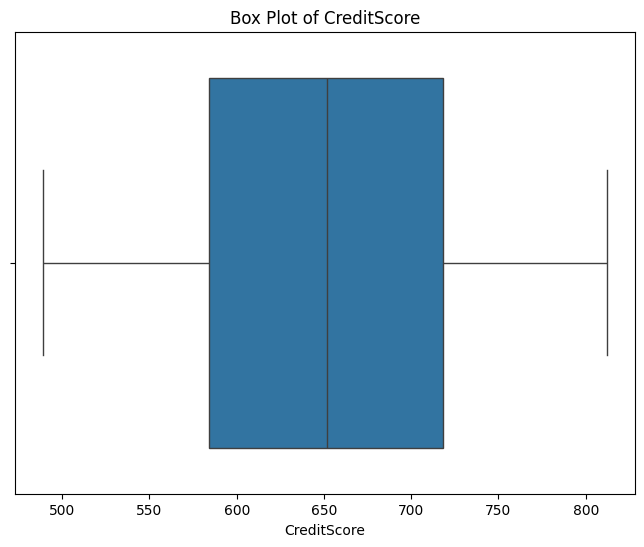


Tidak ada outlier yang terdeteksi di kolom 'CreditScore' menggunakan metode IQR.


c:\Users\User\Downloads\Eksperimen_SML_IbrahimAkbarArsanata\percobaan 1\myenv\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\User\Downloads\Eksperimen_SML_IbrahimAkbarArsanata\percobaan 1\myenv\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


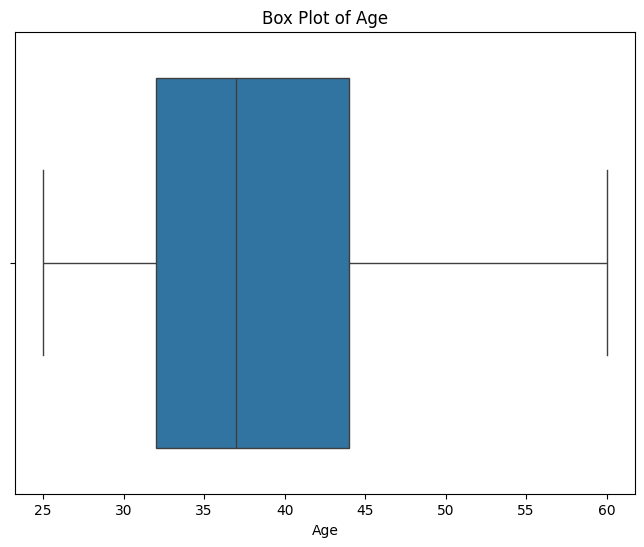


Tidak ada outlier yang terdeteksi di kolom 'Age' menggunakan metode IQR.


c:\Users\User\Downloads\Eksperimen_SML_IbrahimAkbarArsanata\percobaan 1\myenv\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\User\Downloads\Eksperimen_SML_IbrahimAkbarArsanata\percobaan 1\myenv\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


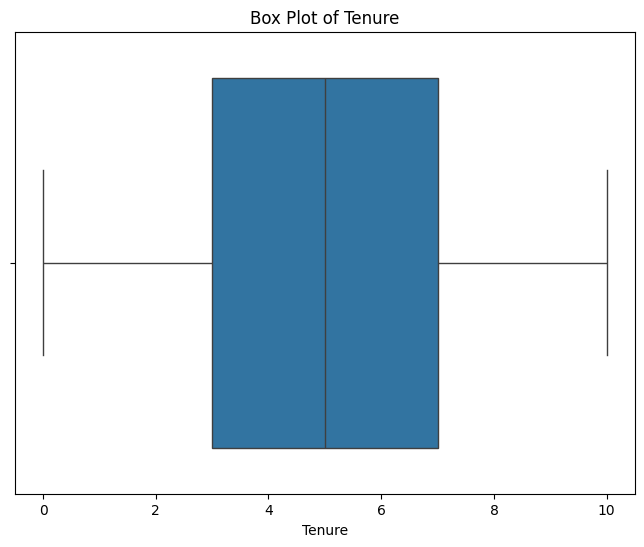


Tidak ada outlier yang terdeteksi di kolom 'Tenure' menggunakan metode IQR.


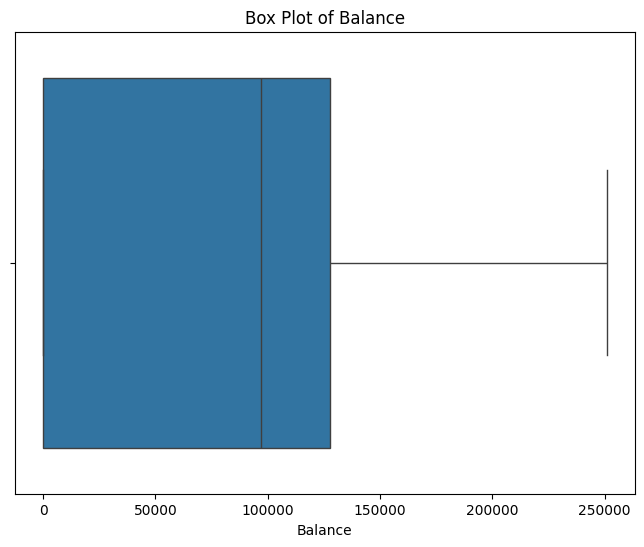


Tidak ada outlier yang terdeteksi di kolom 'Balance' menggunakan metode IQR.


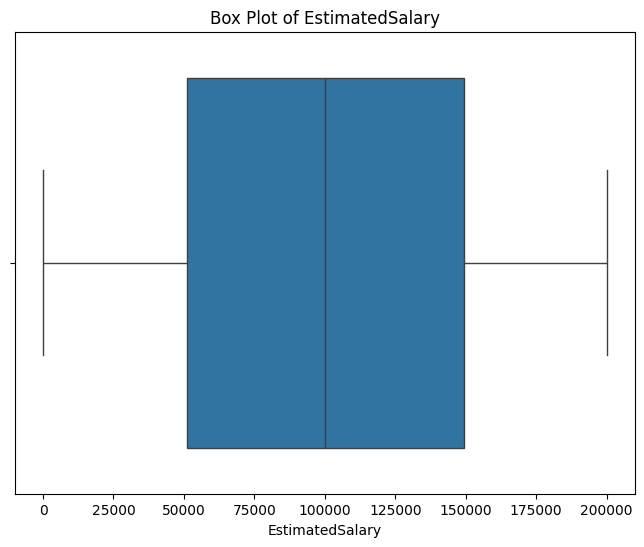


Tidak ada outlier yang terdeteksi di kolom 'EstimatedSalary' menggunakan metode IQR.


In [19]:
# Cell 5: Analisis Outlier
print("Analisis Outlier untuk Kolom Numerik:")

# Kolom yang relevan untuk outlier (tidak termasuk ID dan biner)
outlier_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for col in outlier_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_encoded[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

    # Contoh identifikasi outlier menggunakan IQR (hanya contoh, tidak akan mengubah data)
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_encoded[(df_encoded[col] < lower_bound) | (df_encoded[col] > upper_bound)]
    if not outliers.empty:
        print(f"\nOutlier di kolom '{col}':")
        print(outliers[[col]])
    else:
        print(f"\nTidak ada outlier yang terdeteksi di kolom '{col}' menggunakan metode IQR.")

In [20]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceToSalaryRatio
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,3.878703
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,108.337260
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.747002
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.514022
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,10614.655440


## Drop Columns

In [21]:
df_cleaned = df_encoded.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

## Train test split

In [22]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df_cleaned.drop('Exited', axis=1) # Semua kolom kecuali 'Exited' adalah fitur
y = df_cleaned['Exited']             # Kolom 'Exited' adalah target

# Lakukan train-test split
# test_size=0.20 berarti 20% data akan digunakan untuk pengujian
# random_state untuk memastikan hasil split yang sama setiap kali kode dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Jumlah data training fitur (X_train): {X_train.shape[0]} baris")
print(f"Jumlah data testing fitur (X_test): {X_test.shape[0]} baris")
print(f"Jumlah data training target (y_train): {y_train.shape[0]} baris")
print(f"Jumlah data testing target (y_test): {y_test.shape[0]} baris")

Jumlah data training fitur (X_train): 8000 baris
Jumlah data testing fitur (X_test): 2000 baris
Jumlah data training target (y_train): 8000 baris
Jumlah data testing target (y_test): 2000 baris


## Normalisasi

In [23]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Daftar fitur yang akan di-scaling
features_to_scale = [
    'CreditScore',
    'Age',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary',
    'BalanceToSalaryRatio'
]

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan StandardScaler pada fitur-fitur yang dipilih di X_train
# fit_transform digunakan untuk menghitung parameter (mean dan std dev) dan sekaligus menerapkan transformasi
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

# Terapkan StandardScaler pada fitur-fitur yang dipilih di X_test
# transform hanya menerapkan transformasi menggunakan parameter yang sudah dihitung dari X_train
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

print("Fitur-fitur di X_train setelah scaling:")
print(X_train[features_to_scale].head())

print("\nFitur-fitur di X_test setelah scaling:")
print(X_test[features_to_scale].head())

Fitur-fitur di X_train setelah scaling:
      CreditScore       Age   Balance  NumOfProducts  EstimatedSalary  \
9254     0.376926 -0.714221 -1.218471       0.808436         1.367670   
1561    -0.221252  0.354672  0.696838       0.808436         1.661254   
1670    -1.029900 -1.462446  0.618629      -0.916688        -0.252807   
6087    -1.007746 -1.248667  0.953212      -0.916688         0.915393   
6669    -1.495150  1.851122  1.057449      -0.916688        -1.059600   

      BalanceToSalaryRatio  
9254             -0.133123  
1561             -0.103370  
1670             -0.068007  
6087             -0.089933  
6669              0.042344  

Fitur-fitur di X_test setelah scaling:
      CreditScore       Age   Balance  NumOfProducts  EstimatedSalary  \
6252    -0.620038 -0.714221  0.329937       0.808436        -1.019605   
4684    -0.320949  0.461561 -1.218471       0.808436         0.798883   
1731    -0.564651  0.568451 -1.218471       0.808436        -0.727980   
4742    -1.6170

## Imbalanced Class

In [24]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceToSalaryRatio,Gender_Male,Geography_Germany,Geography_Spain
9254,0.376926,-0.714221,6,-1.218471,0.808436,1,1,1.367670,-0.133123,True,False,False
1561,-0.221252,0.354672,4,0.696838,0.808436,1,1,1.661254,-0.103370,True,True,False
1670,-1.029900,-1.462446,3,0.618629,-0.916688,1,0,-0.252807,-0.068007,True,False,True
6087,-1.007746,-1.248667,9,0.953212,-0.916688,1,0,0.915393,-0.089933,False,False,False
6669,-1.495150,1.851122,9,1.057449,-0.916688,0,0,-1.059600,0.042344,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.285270,1.637343,8,-0.102301,-0.916688,1,1,-0.539860,-0.084146,True,False,False
5191,0.332616,2.064900,1,-1.218471,-0.916688,1,1,-1.733882,-0.133123,False,False,False
5390,0.919717,-0.072885,1,-1.218471,2.533560,0,0,-0.142765,-0.133123,False,False,False
860,0.166455,0.461561,8,1.827259,-0.916688,1,0,-0.050826,-0.038029,True,False,False


In [30]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Inisialisasi SMOTE
# random_state digunakan untuk reproduksibilitas hasil
smote = SMOTE(random_state=42)

# Terapkan SMOTE pada X_train dan y_train
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Jumlah sampel di X_train sebelum SMOTE: {X_train.shape[0]} baris")
print(f"Jumlah sampel di y_train sebelum SMOTE:")
print(y_train.value_counts())

print(f"\nJumlah sampel di X_train_smote setelah SMOTE: {X_train_smote.shape[0]} baris")
print(f"Jumlah sampel di y_train_smote setelah SMOTE:")
print(y_train_smote.value_counts())

Jumlah sampel di X_train sebelum SMOTE: 8000 baris
Jumlah sampel di y_train sebelum SMOTE:
Exited
0    6356
1    1644
Name: count, dtype: int64

Jumlah sampel di X_train_smote setelah SMOTE: 12712 baris
Jumlah sampel di y_train_smote setelah SMOTE:
Exited
0    6356
1    6356
Name: count, dtype: int64


In [26]:
X_train_smote

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceToSalaryRatio,Gender_Male,Geography_Germany,Geography_Spain
0,0.376926,-0.714221,6,-1.218471,0.808436,1,1,1.367670,-0.133123,True,False,False
1,-0.221252,0.354672,4,0.696838,0.808436,1,1,1.661254,-0.103370,True,True,False
2,-1.029900,-1.462446,3,0.618629,-0.916688,1,0,-0.252807,-0.068007,True,False,True
3,-1.007746,-1.248667,9,0.953212,-0.916688,1,0,0.915393,-0.089933,False,False,False
4,-1.495150,1.851122,9,1.057449,-0.916688,0,0,-1.059600,0.042344,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12707,0.702652,0.955850,9,1.066379,-0.916688,0,1,-1.616628,1.087749,True,True,False
12708,0.963640,0.491729,9,-1.218471,-0.916688,1,0,1.706718,-0.133123,True,False,True
12709,-0.080418,0.691776,4,0.044701,-0.916688,1,0,1.053105,-0.108539,False,False,True
12710,-0.738356,1.456775,3,1.124511,2.533560,0,1,1.408403,-0.093823,False,True,True
